# Importing all the required libraries

In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#nltk stands for natural language toolkit holding many different libraries
import nltk

In [3]:
#nltk.download_shell()

In [4]:
#reading the dataset and putting in the dataframe df_train
df_train=pd.read_csv('V1.4_Training.csv',names=['sentence','labels'])



# DATA ANALYSIS AND DATA VISUALISATION 

In [5]:
#showing the first 5 entry
df_train.head()

,sentence,labels
663_3,"""Please enable removing language code from the...",1
663_4,"""Note: in your .csproj file, there is a Suppor...",0
664_1,"""Wich means the new version not fully replaced...",0
664_2,"""Some of my users will still receive the old x...",0
664_3,"""The store randomly gives the old xap or the n...",0


In [6]:
#here total 8500 enteries are there
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8500 entries, 663_3 to 2844
Data columns (total 2 columns):
sentence    8500 non-null object
labels      8500 non-null int64
dtypes: int64(1), object(1)
memory usage: 199.2+ KB


In [7]:
#here the value in the label that is 0 and 1 telling us that all those statements having 0 are not suggestion and for 1
# it is the suggestion.
suggestion_count = (df_train['labels'].values == 1).astype(int).sum()
non_suggestion_count = (df_train['labels'].values == 0).astype(int).sum()
print("Total sentences in the dataset : " + str(df_train.shape[0]))
print("Total suggestions out of given sentences: " + str(suggestion_count))
print("Total non_suggestions  out of given sentences: " + str(non_suggestion_count))

Total sentences in the dataset : 8500
Total suggestions out of given sentences: 2085
Total non_suggestions  out of given sentences: 6415


In [8]:
#as you can see the data imblance is there as number of suggestion are very less than non suggestion,so for that i am making it 
# balance by appending samples to suggestion.
suggestions =df_train[df_train['labels'].values == 1]

while suggestion_count < non_suggestion_count:
    random_suggestion = suggestions.sample()
    df_train = df_train.append(random_suggestion, ignore_index = True)
    suggestion_count = suggestion_count + 1

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12830 entries, 0 to 12829
Data columns (total 2 columns):
sentence    12830 non-null object
labels      12830 non-null int64
dtypes: int64(1), object(1)
memory usage: 200.5+ KB


In [9]:
# Now you can see that the data is balance now.Both the suggestion and non-suggestion are equal.
suggestion_count = (df_train['labels'].values == 1).astype(int).sum()
non_suggestion_count = (df_train['labels'].values == 0).astype(int).sum()
print("Total sentences in the dataset : " + str(df_train.shape[0]))
print("Total suggestions out of given sentences: " + str(suggestion_count))
print("Total non_suggestions  out of given sentences: " + str(non_suggestion_count))
               

Total sentences in the dataset : 12830
Total suggestions out of given sentences: 6415
Total non_suggestions  out of given sentences: 6415


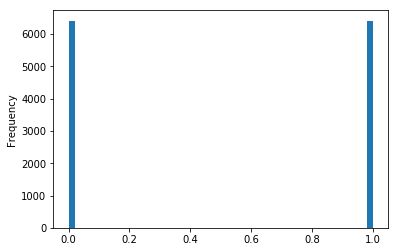

In [112]:
#the histogram of the labels value that is 1 and 0 that why showing rise in 1 and 0 only
df_train['labels'].plot.hist(bins=50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000261DFC67470>,
      dtype=object)

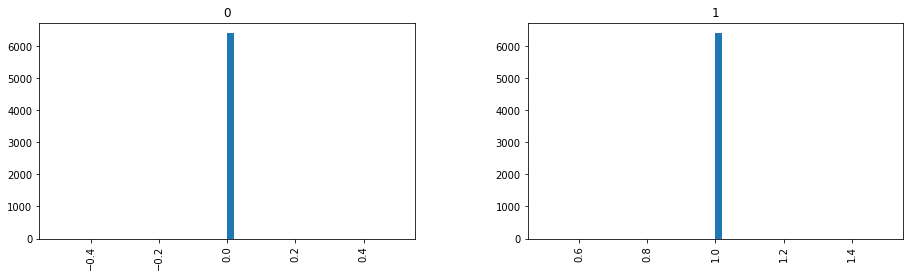

In [114]:
#here both are differently showed  by labels that is 0 and 1 where 0for non suggestion and 1 for suggestion.
df_train.hist(column='labels',by='labels',bins=50,figsize=(15,4))

# PRE-PROCESSING
*** Here i am showing the basic example for cleaning of a sentence by removing the punctuation and stopwords because it will help then makin it more efficient***

In [10]:
import string
    

In [11]:
mess="hi there , my name is mahesh !"

In [12]:
#here removing the punctuation
nopunc=[c for c in mess if c not in string.punctuation]

In [13]:
nopunc=''.join(nopunc)

In [14]:
nopunc

'hi there  my name is mahesh '

In [15]:
nopunc.split()

['hi', 'there', 'my', 'name', 'is', 'mahesh']

In [16]:
#importing stopwords from nltk 
from nltk.corpus import stopwords

In [17]:
#stopwords.words('english')

In [18]:
nopunc.split()

['hi', 'there', 'my', 'name', 'is', 'mahesh']

In [19]:
mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [20]:
# As you can see that we can tokenize and also after cleaning we are left with important words. 
mess

['hi', 'name', 'mahesh']

In [21]:
#applying now to the function
def text_process(mess):
    
    "remove the punctuation"
    "remove the stopwords"
    "return list of clean text words"
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [22]:
df_train.head(10)

,sentence,labels
0,"""Please enable removing language code from the...",1
1,"""Note: in your .csproj file, there is a Suppor...",0
2,"""Wich means the new version not fully replaced...",0
3,"""Some of my users will still receive the old x...",0
4,"""The store randomly gives the old xap or the n...",0
5,"""My app has a WP7 version and a WP8 version XA...",0
6,"""The wp7 xap works only on WP7 and the wp8 xap...",0
7,"""Sometimes the Store gives the wrong wp7 xap v...",0
8,"""It should be an option to remove the ""ru"" lan...",1
9,"""Currently if you ever mistakenly selected a ""...",0


In [23]:
#the text process function passes to the all the sentences for the pre-processing or cleaning.
df_train['sentence'].head(10).apply(text_process)

0    [Please, enable, removing, language, code, Dev...
1    [Note, csproj, file, SupportedCultures, entry,...
2    [Wich, means, new, version, fully, replaced, o...
3      [users, still, receive, old, xap, version, app]
4    [store, randomly, gives, old, xap, new, xap, v...
5    [app, WP7, version, WP8, version, XAP, submiss...
6         [wp7, xap, works, WP7, wp8, xap, works, WP8]
7    [Sometimes, Store, gives, wrong, wp7, xap, ver...
8    [option, remove, ru, language, code, app, lang...
9    [Currently, ever, mistakenly, selected, ru, la...
Name: sentence, dtype: object

# FEATURE EXTRACTION


In [24]:
#The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known word.
from sklearn.feature_extraction.text import CountVectorizer 

In [25]:
#this bag of words creating a very big matrix,so it may take time to execute.
bow_transformer= CountVectorizer(analyzer=text_process).fit(df_train['sentence'])

In [26]:
#it is just going to print total number of vocab words
print(len(bow_transformer.vocabulary_))

12137


In [27]:
#now taking one sample text message and getting count of the bow(bag of words)

sentence1=df_train['sentence'][0]

In [28]:
print(sentence1)

"Please enable removing language code from the Dev Center "language history" For example if you ever selected "ru" and "ru-ru" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad."


In [29]:
#here the bow has been created for the sentence  and the sentence1 has been passed as item.
bow1= bow_transformer.transform([sentence1])

In [30]:
#after printing it will show the count of the number of word occur in a paricular sentence.
print(bow1)

  (0, 899)	1
  (0, 1233)	1
  (0, 2873)	1
  (0, 3500)	1
  (0, 3685)	1
  (0, 4831)	1
  (0, 5201)	1
  (0, 5391)	1
  (0, 6395)	1
  (0, 6472)	1
  (0, 6516)	1
  (0, 6530)	1
  (0, 7284)	1
  (0, 8090)	1
  (0, 8095)	2
  (0, 8263)	2
  (0, 9682)	1
  (0, 9990)	1
  (0, 10230)	1
  (0, 10242)	1
  (0, 10391)	1
  (0, 10514)	1
  (0, 11231)	1
  (0, 12056)	1


In [31]:
#now here we are checking that sentence in which the word is coming 2 times,here it is language ,you can see sentence1 and verify

bow_transformer.get_feature_names()[8095]

'language'

In [32]:
#here the bow has been created for the all sentences and the sentences has been passed as item.
bow_all= bow_transformer.transform(df_train['sentence'])

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

In [50]:
tfidf_transformer = TfidfTransformer().fit(bow_all)

In [51]:
#for a single sentence

tfidf1 = tfidf_transformer.transform(bow1)

In [52]:
print(tfidf1)

  (0, 12056)	0.20506949266292765
  (0, 11231)	0.16978814224063482
  (0, 10514)	0.1468014356159061
  (0, 10391)	0.17452335377402386
  (0, 10242)	0.21830612493909113
  (0, 10230)	0.1952601904693397
  (0, 9990)	0.20506949266292765
  (0, 9682)	0.18329427733827403
  (0, 8263)	0.40145634656722046
  (0, 8095)	0.3303218067008133
  (0, 8090)	0.2270409654363574
  (0, 7284)	0.19212776182405572
  (0, 6530)	0.1382947961517365
  (0, 6516)	0.19696755138302763
  (0, 6472)	0.2270409654363574
  (0, 6395)	0.16516090335040665
  (0, 5391)	0.13775214294822824
  (0, 5201)	0.1899877836488837
  (0, 4831)	0.1774465652215899
  (0, 3685)	0.20506949266292765
  (0, 3500)	0.1431894305769769
  (0, 2873)	0.10561948511785868
  (0, 1233)	0.17532806080264574
  (0, 899)	0.1708123580183146


In [57]:
#checking the inverse document frequency of a paricular word

tfidf_transformer.idf_[bow_transformer.vocabulary_['please']]

4.8428482992284465

In [58]:
tfidf_all=tfidf_transformer.transform(bow_all)

In [59]:
#now i am using naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

In [61]:
model=MultinomialNB().fit(tfidf_all,df_train['labels'])

In [1]:
#JUST TRYING TO CHANGE THE VALUES TO SUGGESTION AND NON-SUGGESTION
#    for  c in c:
#     (df_train['labels'].values == 1):
 #       df_train['labels'][c]=df_train['labels']['suggestion']
   # else:
  #      df_train['labels']=df_train['labels']['not suggestion']

In [64]:
# the given sentence is giving value 1 ,that meant it is a suggestion
model.predict(tfidf1)[0]

1

In [77]:
all_pred = model.predict(tfidf_all)
all_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [78]:
from sklearn.cross_validation import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split( df_train['sentence'], df_train['labels'], test_size=0.33)

In [85]:
#Xtrain,X_test,y_test,y_train
#we can check indivuallly an here dataset have been divided for training and testing

# PIPELINE
***The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.Also if we are using pipeline we do not have to use the all the above procedure as pipeline  makes  it very easier.

In [87]:
from sklearn.pipeline import Pipeline

In [101]:
pipeline=Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)),
        ('tfidf',TfidfTransformer()),
        ('classifier',MultinomialNB())
       
    
    
         ])

In [90]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000261DE09EF28>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [91]:
prediction=pipeline.predict(X_test)

In [92]:
from sklearn.metrics import classification_report

In [93]:
# Naive bayes classifier giving prediction for the suggestion and non suggestion
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.91      0.69      0.78      2118
          1       0.75      0.93      0.83      2116

avg / total       0.83      0.81      0.81      4234



In [94]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
pipeline=Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)),
        ('tfidf',TfidfTransformer()),
        ('classifier2',RandomForestClassifier())
    
    
         ])

In [105]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000261DE09EF28>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [106]:
prediction=pipeline.predict(X_test)

In [107]:
from sklearn.metrics import classification_report

In [108]:
#random forest classifier giving the predictions better than naive bayes classifier.
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.93      0.88      0.91      2118
          1       0.89      0.94      0.91      2116

avg / total       0.91      0.91      0.91      4234

